## Data Science Assignment - 3 

## Implementation of K-nearest neighbors in the diabetes dataset. 

### What is K-nearest neighbor algorithm?

Type of algorithm : Supervised machine learning

Type of problems it can solve: Classification and Regression

Description:

It basically classifies the new data points based on the majority of the votes obtained from the neighboring points and assigns the label of this data point to the class which has majority votes. 

#### How do we decide the factor K?

K is the hyperparameter for this algorithm which we need to decide at the start before we fit the data into the algorithm. 

K is the number of neighbors whose votes will be considered during run of the algorithm. 

We need to see impact of K-value on the accuracy of the model. 

I am taking a diabetes dataset and try to identify whether person has diabetes or not. 


In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
#Load the dataset
df = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Let's observe the shape of the dataframe.
df.shape

(768, 9)

In [5]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [8]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
print(train_accuracy)
test_accuracy = np.empty(len(neighbors))
print(test_accuracy)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

[1.38777950e-311 1.38777736e-311 1.38777636e-311 1.38777568e-311
 1.38777955e-311 1.38778027e-311 1.38777475e-311 1.38778027e-311]
[1.38777950e-311 1.38777736e-311 1.38777636e-311 1.38777568e-311
 1.38777955e-311 1.38778027e-311 1.38777475e-311 1.38778027e-311]


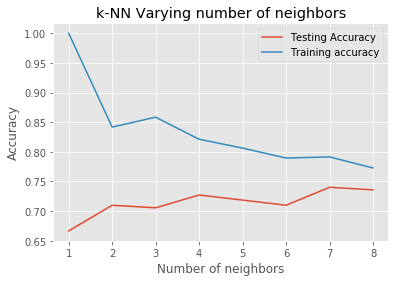

In [9]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [11]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [12]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7402597402597403

In [13]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [14]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)


In [15]:
confusion_matrix(y_test,y_pred)

array([[129,  21],
       [ 39,  42]], dtype=int64)

In [16]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,129,21,150
1,39,42,81
All,168,63,231


In [17]:
#import classification_report
from sklearn.metrics import classification_report


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [19]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [20]:
from sklearn.metrics import roc_curve

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

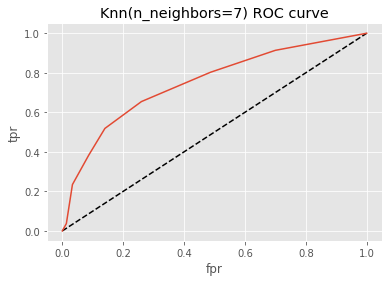

In [22]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [23]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7490123456790124

### What happens if we set up k = 9?



In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=9)

In [25]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [26]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7229437229437229

In [27]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [28]:
confusion_matrix(y_test,y_pred)

array([[125,  25],
       [ 39,  42]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       150
           1       0.63      0.52      0.57        81

   micro avg       0.72      0.72      0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.72       231



In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

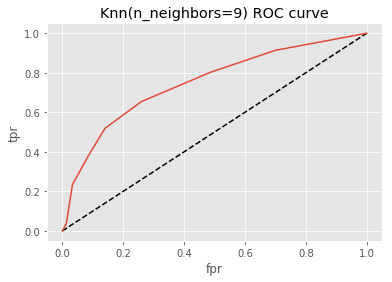

In [31]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

### What happens when value of K=5?

It is important to see effect of K value on the performance of the model before we proceed to tune the hyperparameters to get the best accuracy of the model. 

In [32]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [33]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7186147186147186

In [35]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [36]:
confusion_matrix(y_test,y_pred)

array([[125,  25],
       [ 40,  41]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.62      0.51      0.56        81

   micro avg       0.72      0.72      0.72       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.72      0.71       231



In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

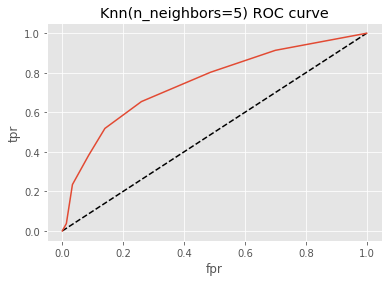

In [39]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [79]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [80]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [81]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7359307359307359

In [82]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [83]:
confusion_matrix(y_test,y_pred)

array([[131,  19],
       [ 42,  39]], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.48      0.56        81

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

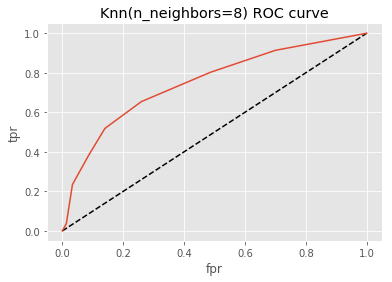

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

### Hyperparameter tuning

In [87]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [92]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,120)}

In [93]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([  1,   2, ..., 118, 119])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
knn_cv.best_score_

0.7578125

In [95]:
knn_cv.best_params_

{'n_neighbors': 14}

Thus a knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 i.e about 76%

### Citations

https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learn

https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/pima-indians-diabetes-database.zip/1

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

https://medium.com/machine-learning-101/k-nearest-neighbors-classifier-1c1ff404d265

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn